In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [407]:
stores  =  pd.read_csv("D:/IDMP/Project TS/stores.csv")
trans   =  pd.read_csv("D:/IDMP/Project TS/transactions.csv") 
oil     =  pd.read_csv("D:/IDMP/Project TS/oil.csv")
train   =  pd.read_csv("D:/IDMP/Project TS/train.csv")
holiday =  pd.read_csv("D:/IDMP/Project TS/holidays_events.csv")

df1 = train.merge(stores,how = 'left', on='store_nbr')
df2 = df1.merge(trans, how = 'left', on = ['date','store_nbr'])
df3 = df2.merge(oil, how = 'left', on='date')
df = df3.merge(holiday, how='left', on='date')

df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [408]:
df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
transactions     249117
dcoilwtico       955152
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

In [409]:
df = df.drop(['type_y','locale','locale_name','description','transferred'], axis=1)
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN


In [410]:
df['date'] = pd.to_datetime(df['date'])

#### Handling missing values of Transactions:

In [411]:
#considering the dataframe with all null values of transcations
df[df['transactions'].isnull()]

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2838523,2790409,2017-04-19,52,POULTRY,0.0,0.0,Manta,Manabi,A,11,NaN,50.49
2838524,2790410,2017-04-19,52,PREPARED FOODS,0.0,0.0,Manta,Manabi,A,11,NaN,50.49
2838525,2790411,2017-04-19,52,PRODUCE,0.0,0.0,Manta,Manabi,A,11,NaN,50.49
2838526,2790412,2017-04-19,52,SCHOOL AND OFFICE SUPPLIES,0.0,0.0,Manta,Manabi,A,11,NaN,50.49


In [412]:
#visulaize how the missing value looks in a graph
#import plotly.express as px

#fig = px.scatter(df, x='date', y='transactions')

#fig.update_xaxes(
            #rangeslider_visible = True,
            #rangeselector = dict(
            # buttons = list([
                ## dict(count=1,label='1y',step='year',stepmode='backward'),
                 #dict(count=2,label='2y',step='year',stepmode='backward'),
                 #dict(count=3,label='3y',step='year',stepmode='backward'),
                 #dict(step='all')
             #])
       # )
    #)
#
#fig.show()

In [413]:
#setting date as index
df = df.set_index('date')

In [414]:
#viewing missing transactions for a month
df['2013-01-01':'2013-02-01']

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico
date,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0.0,Quito,Pichincha,D,13,NaN,NaN
2013-01-01,1,1,BABY CARE,0.000,0.0,Quito,Pichincha,D,13,NaN,NaN
2013-01-01,2,1,BEAUTY,0.000,0.0,Quito,Pichincha,D,13,NaN,NaN
2013-01-01,3,1,BEVERAGES,0.000,0.0,Quito,Pichincha,D,13,NaN,NaN
2013-01-01,4,1,BOOKS,0.000,0.0,Quito,Pichincha,D,13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2013-02-01,57019,9,POULTRY,411.242,0.0,Quito,Pichincha,B,6,2031.0,97.46
2013-02-01,57020,9,PREPARED FOODS,62.000,0.0,Quito,Pichincha,B,6,2031.0,97.46
2013-02-01,57021,9,PRODUCE,0.000,0.0,Quito,Pichincha,B,6,2031.0,97.46


In [415]:
#create a copy of original dataframe
df_na = df.copy()

#remove all the null valued from the new df
df_na = df_na.dropna()

##### To understand the nature of transactions, we will use autocorrelation plot

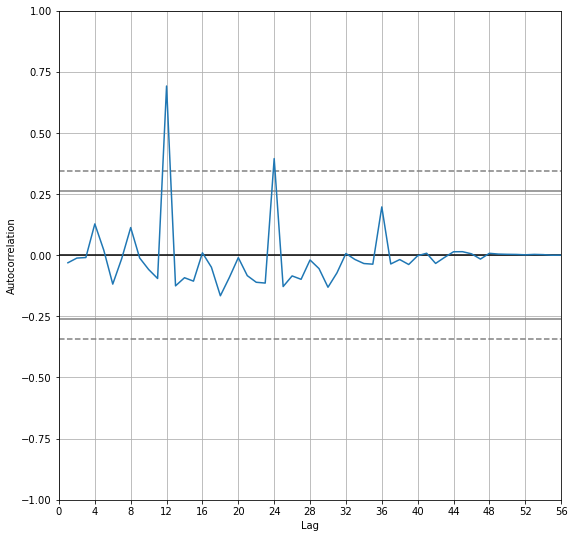

In [416]:
#autocorrelation plot of transaction from 2013 to 2017 sampled over every month
plt.figure(figsize=(9,9))
pd.plotting.autocorrelation_plot(df_na['2013':'2017']['transactions'].resample('1m').mean())
plt.xticks(np.arange(0,60,4))
plt.show()

##### Lag in this case indicates months since transctions are sampled fo every month from 2013 to 2017.
##### From the plot: There is a peak in the transcations for every 4 months, indicating there is correlation of transactions every 4 months = seasonality.
##### Hence we can impute the transactions values fo every 4 montrhs with the mean transaction values of  last day of 3rd month. 
##### In order to do so, we have to create subset of the dataframe for every 4 months

##### Since there might be unpredictable transactions because of holidays or any events i.e there can some factors affecting the seasonality of transactions.
##### So to check that we use lag plot which gives the correlation of transactions for different time lags

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

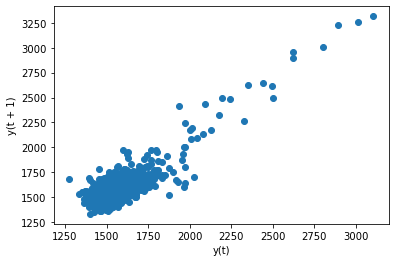

In [417]:
#sampling the transactions for everyday and visulizing the lag plot
pd.plotting.lag_plot(df_na['transactions'].resample('1D').mean(), lag=1)

##### Here in the graph we are looking at the correlation between the mean transactions of current day y(t+1) to mean transcations of previous day y(t)
##### Since this shows linearity between a trasactions on current day and transaction on the previous day.
##### This confirms that we can impute the null values in the transactions with mean transaction of previous day 

In [13]:
#checking the number of rows on each day
rows_2013 = []
rows_2014 = []
rows_2015 = []
rows_2016 = []
rows_2017 = []
for j in  df.index.month.unique():
    for i in df.index.day.unique():
        rows_2013.append((df[((df.index.year ==2013) & (df.index.day ==i) & (df.index.month==j))].shape))
        rows_2014.append((df[((df.index.year ==2014) & (df.index.day ==i) & (df.index.month==j))].shape))
        rows_2015.append((df[((df.index.year ==2015) & (df.index.day ==i) & (df.index.month==j))].shape))
        rows_2016.append((df[((df.index.year ==2016) & (df.index.day ==i) & (df.index.month==j))].shape))
        rows_2017.append((df[((df.index.year ==2017) & (df.index.day ==i) & (df.index.month==j))].shape))

ro = pd.DataFrame(data = {'rows_2013':rows_2013,
                         'rows_2014':rows_2014,
                         'rows_2015':rows_2015,
                         'rows_2016':rows_2016,
                         'rows_2017':rows_2017})

print(ro['rows_2013'].value_counts(),
     ro['rows_2014'].value_counts(),
     ro['rows_2015'].value_counts(),
     ro['rows_2016'].value_counts(),
     ro['rows_2017'].value_counts())
        

KeyboardInterrupt: 


##### For almost every year each day has 1782 records and We will impute the transcation values with mean of previous day taking 1782 record values as rolling window size

In [418]:
df1 = df.drop(['dcoilwtico','family','type_x','city','state'], axis=1)

In [419]:
df1.isnull().sum()

id                   0
store_nbr            0
sales                0
onpromotion          0
cluster              0
transactions    249117
dtype: int64

In [420]:
#imputing null values transactions with mean of the previous day
df1 = df1.rolling(window=1782, min_periods=1).mean()

In [421]:
df1.isnull().sum()

id                0
store_nbr         0
sales             0
onpromotion       0
cluster           0
transactions    926
dtype: int64

In [422]:
df1 = pd.concat([df1,df[['dcoilwtico','family','type_x','city','state']]],axis=1)

In [423]:
#Since the remaining null values are all from 2013-01-01, we can impute those values with mean values of  2013-01-02
#df1 = df1.fillna(df[((df.index.year ==2013) & (df.index.day ==2) & (df.index.month==1))]['transactions'].mean())
df1 = df1.fillna(0)
df1.isnull().sum()

id              0
store_nbr       0
sales           0
onpromotion     0
cluster         0
transactions    0
dcoilwtico      0
family          0
type_x          0
city            0
state           0
dtype: int64

In [424]:
df1 = df1.fillna(method='ffill')
df1 = df1.fillna(method='bfill')
df1.isnull().sum()

id              0
store_nbr       0
sales           0
onpromotion     0
cluster         0
transactions    0
dcoilwtico      0
family          0
type_x          0
city            0
state           0
dtype: int64

In [425]:
df1['transactions'] = round(df1['transactions'])

<AxesSubplot:>

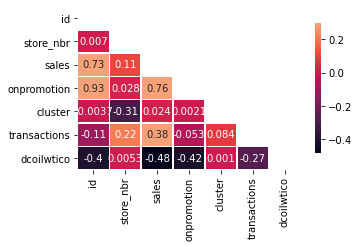

In [426]:
Corr = df1.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(Corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5,3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Corr,cmap='rocket', mask = mask,vmax=.3, center=0, linewidths=.5, cbar_kws={"shrink": .8}, annot = True)

In [427]:
df2 = df1.reset_index()

In [428]:
df_trans_month = df2.groupby([pd.Grouper(key='date',freq='D')]).agg(trans_mean = ('transactions','mean'))
df_trans_month = df_trans_month.reset_index()
df_trans_month['trans_mean'] = round(df_trans_month['trans_mean'])
df_trans_month.head()

,date,trans_mean
0,2013-01-01,528.0
1,2013-01-02,1736.0
2,2013-01-03,1892.0
3,2013-01-04,1691.0
4,2013-01-05,1843.0


In [429]:
df_sales_month = df2.groupby([pd.Grouper(key='date',freq='D')]).agg(sales_mean = ('sales','mean'))
df_sales_month = df_sales_month.reset_index()
df_sales_month.head()

,date,sales_mean
0,2013-01-01,1.604608
1,2013-01-02,118.030945
2,2013-01-03,248.961345
3,2013-01-04,199.312673
4,2013-01-05,227.326058


In [430]:
dfa = df_trans_month.merge(df_sales_month, on='date')
dfa = dfa.dropna()
dfa.head()

,date,trans_mean,sales_mean
0,2013-01-01,528.0,1.604608
1,2013-01-02,1736.0,118.030945
2,2013-01-03,1892.0,248.961345
3,2013-01-04,1691.0,199.312673
4,2013-01-05,1843.0,227.326058


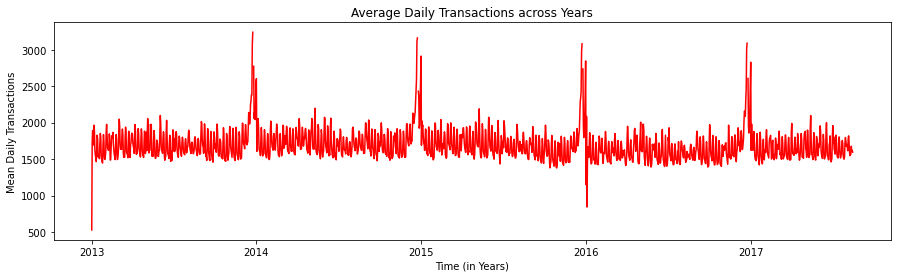

In [431]:
plt.figure(figsize=(15,4))
ax = plt.axes()
plt.plot('date','trans_mean',data=df_trans_month, c='r')
#ax.set_facecolor('#eafff5')
plt.xlabel("Time (in Years)")
plt.ylabel("Mean Daily Transactions")
plt.title("Average Daily Transactions across Years")
plt.show()

##### Seasonality = There is a peak in the transactions at the start of every year

In [432]:
dft = df_trans_month.set_index('date')

In [433]:
dfa = dfa.set_index('date')

In [434]:
df1.head()

,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,family,type_x,city,state
date,,,,,,,,,,,
2013-01-01,0.0,1.0,0.0,0.0,13.0,0.0,0.0,AUTOMOTIVE,D,Quito,Pichincha
2013-01-01,0.5,1.0,0.0,0.0,13.0,0.0,0.0,BABY CARE,D,Quito,Pichincha
2013-01-01,1.0,1.0,0.0,0.0,13.0,0.0,0.0,BEAUTY,D,Quito,Pichincha
2013-01-01,1.5,1.0,0.0,0.0,13.0,0.0,0.0,BEVERAGES,D,Quito,Pichincha
2013-01-01,2.0,1.0,0.0,0.0,13.0,0.0,0.0,BOOKS,D,Quito,Pichincha


In [435]:
df1['city'].unique()

array(['Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra',
       'Santo Domingo', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil',
       'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad',
       'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [455]:
df1= df1.reset_index()

In [458]:
df1['year']= df1['date'].dt.year

In [502]:
#fam = df1.groupby(['family'])
fam = df1.set_index('city')
fam['transactions']

city
Quito       0.0
Quito       0.0
Quito       0.0
Quito       0.0
Quito       0.0
          ...  
Quito    1603.0
Quito    1603.0
Quito    1603.0
Quito    1603.0
Quito    1603.0
Name: transactions, Length: 3054348, dtype: float64

In [503]:
#fam = fam.sample(frac=0.3,replace=True,random_state=1)
fam['year'] = fam['date'].dt.year
fam = fam.groupby([pd.Grouper(key='date',freq='D')]).agg(sales_mean = ('sales','mean'))
fam = fam.reset_index()
fam.head()

fam = fam['sales_mean']


# split dataframe by row
splits = [fam.loc[[i]] for i in fam.index.unique()]
  
# view splitted dataframe
print(splits)

[0    1.604608
Name: sales_mean, dtype: float64, 1    118.030945
Name: sales_mean, dtype: float64, 2    248.961345
Name: sales_mean, dtype: float64, 3    199.312673
Name: sales_mean, dtype: float64, 4    227.326058
Name: sales_mean, dtype: float64, 5    270.85164
Name: sales_mean, dtype: float64, 6    257.133253
Name: sales_mean, dtype: float64, 7    184.930577
Name: sales_mean, dtype: float64, 8    174.908037
Name: sales_mean, dtype: float64, 9    160.017807
Name: sales_mean, dtype: float64, 10    150.665614
Name: sales_mean, dtype: float64, 11    189.655985
Name: sales_mean, dtype: float64, 12    234.956072
Name: sales_mean, dtype: float64, 13    227.216922
Name: sales_mean, dtype: float64, 14    167.439384
Name: sales_mean, dtype: float64, 15    168.611347
Name: sales_mean, dtype: float64, 16    169.316989
Name: sales_mean, dtype: float64, 17    155.767362
Name: sales_mean, dtype: float64, 18    197.850526
Name: sales_mean, dtype: float64, 19    243.501555
Name: sales_mean, dtype: f

IndexError: list index out of range

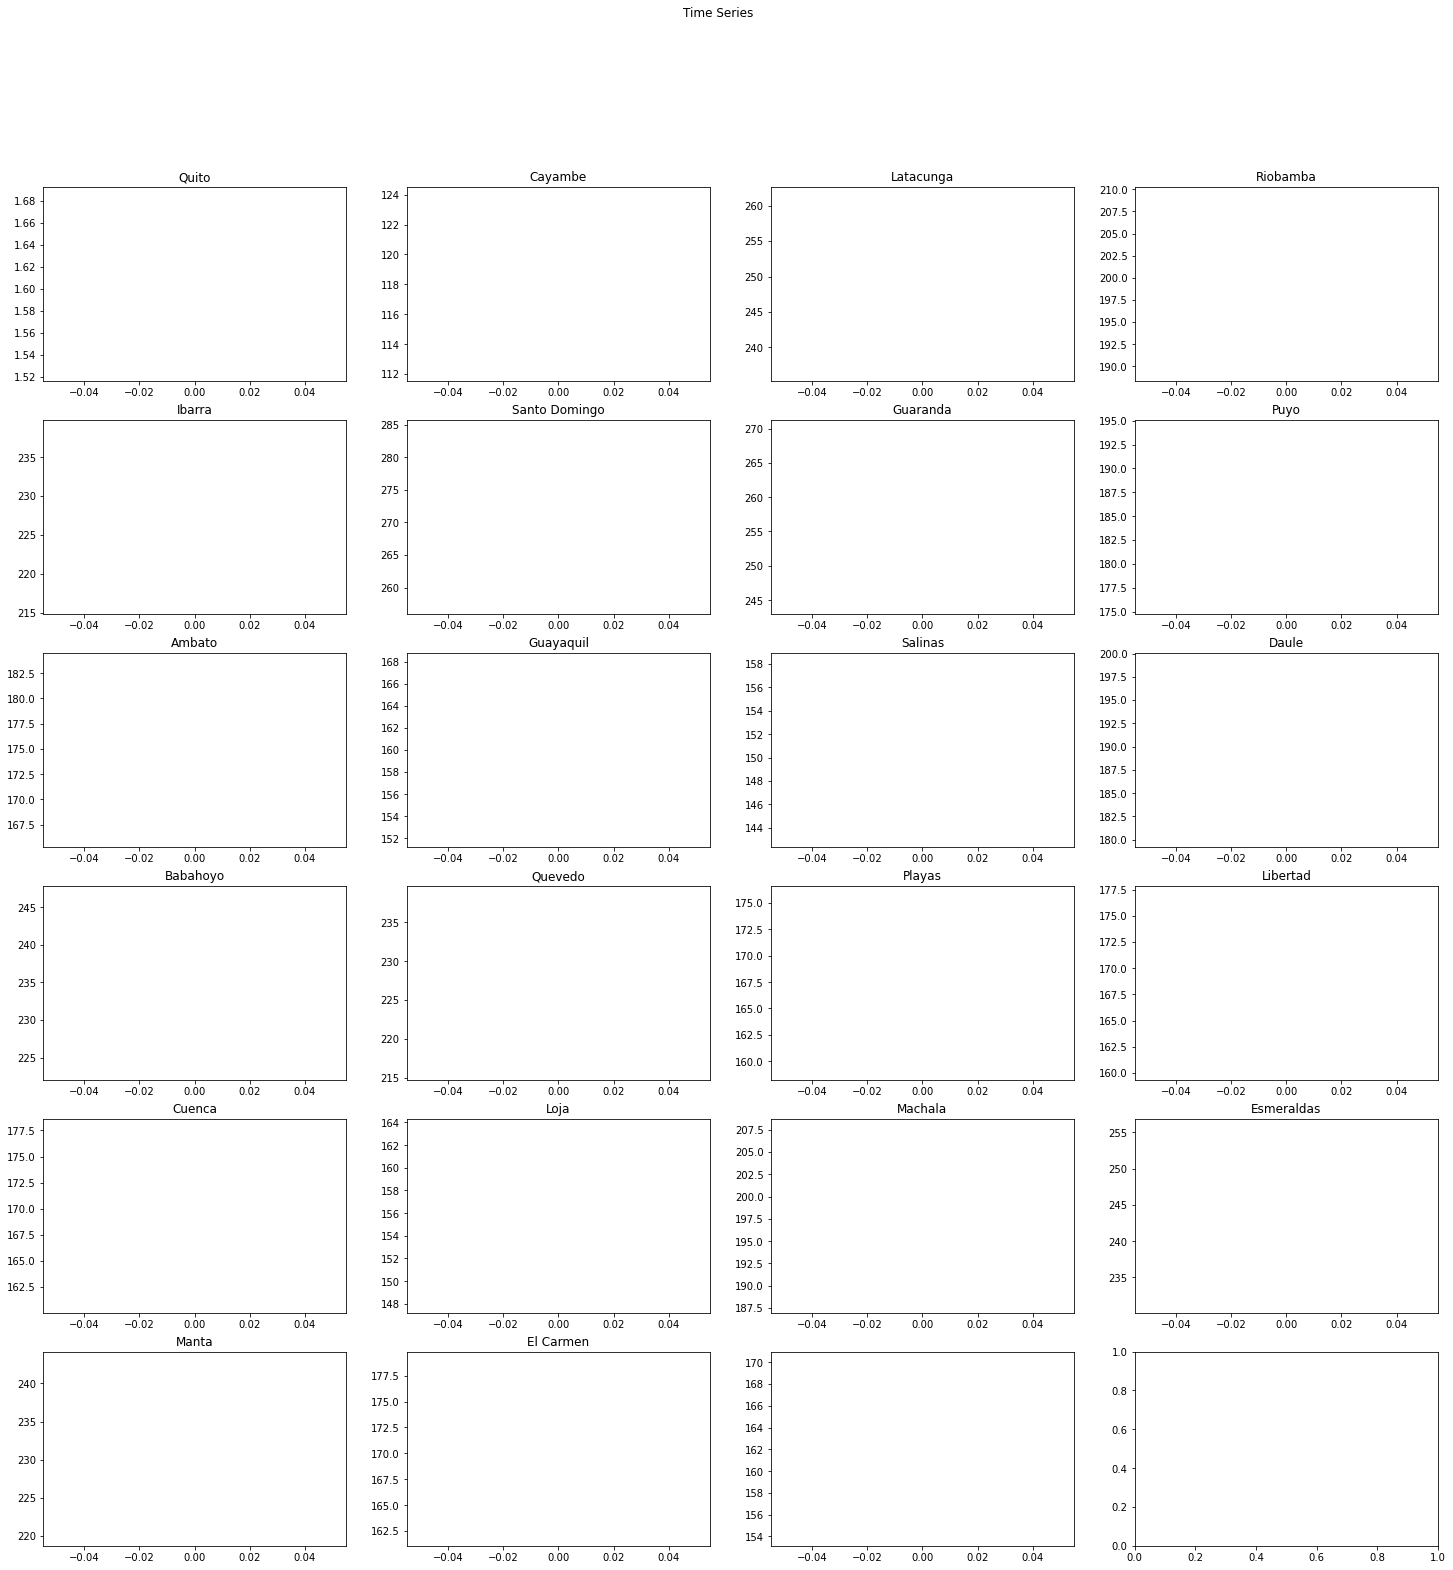

In [504]:
name = ['Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra',
       'Santo Domingo', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil',
       'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad',
       'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen']
#name.append(fam.index.unique())
fig, axs = plt.subplots(6,4,figsize=(25,25))
fig.suptitle('Time Series')
for i in range(6):
    for j in range(4):
        if i*4+j+1>len(splits): # pass the others that we can't fill
            continue
        axs[i, j].plot(splits[i*4+j].values)
        axs[i, j].set_title(name[i*4+j])
plt.show()
    

In [465]:
df1.head()

,date,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,family,type_x,city,state,year
0,2013-01-01,0.0,1.0,0.0,0.0,13.0,0.0,0.0,AUTOMOTIVE,D,Quito,Pichincha,2013
1,2013-01-01,0.5,1.0,0.0,0.0,13.0,0.0,0.0,BABY CARE,D,Quito,Pichincha,2013
2,2013-01-01,1.0,1.0,0.0,0.0,13.0,0.0,0.0,BEAUTY,D,Quito,Pichincha,2013
3,2013-01-01,1.5,1.0,0.0,0.0,13.0,0.0,0.0,BEVERAGES,D,Quito,Pichincha,2013
4,2013-01-01,2.0,1.0,0.0,0.0,13.0,0.0,0.0,BOOKS,D,Quito,Pichincha,2013


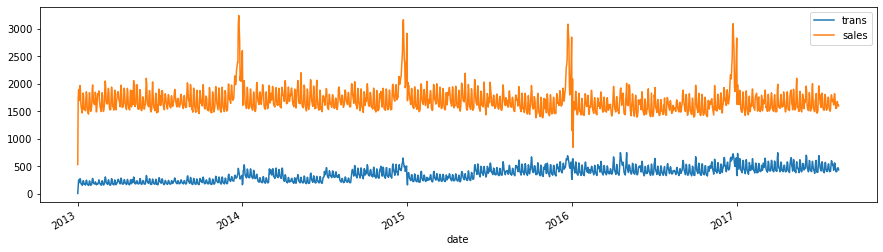

In [470]:
ts1 = dfa['sales_mean']
ts2 = dfa['trans_mean']

plt.figure(figsize=(15,4))
ts1.plot()
ts2.plot()
plt.legend(['trans','sales'])
plt.show()

In [473]:
import math
def euclid_dist(t1,t2):
    return math.sqrt(sum((t1-t2)**2))

euclid_dist(ts1,ts2)

55631.11183362329

In [474]:
def DTWDistance(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [475]:
DTWDistance(ts1,ts2)

41931.83675907637

In [477]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return math.sqrt(LB_sum)

In [483]:
LB_Keogh(ts1,ts2,40000)

8604.138112418255

In [353]:
#df1 = df1.reset_index()
df1['transactions'] = df1['transactions'].astype(int)
df1['transactions']

0             0
1             0
2             0
3             0
4             0
           ... 
3054343    1603
3054344    1603
3054345    1603
3054346    1603
3054347    1603
Name: transactions, Length: 3054348, dtype: int32

In [505]:
df1.head()

,date,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,family,type_x,city,state,year
0,2013-01-01,0.0,1.0,0.0,0.0,13.0,0.0,0.0,AUTOMOTIVE,D,Quito,Pichincha,2013
1,2013-01-01,0.5,1.0,0.0,0.0,13.0,0.0,0.0,BABY CARE,D,Quito,Pichincha,2013
2,2013-01-01,1.0,1.0,0.0,0.0,13.0,0.0,0.0,BEAUTY,D,Quito,Pichincha,2013
3,2013-01-01,1.5,1.0,0.0,0.0,13.0,0.0,0.0,BEVERAGES,D,Quito,Pichincha,2013
4,2013-01-01,2.0,1.0,0.0,0.0,13.0,0.0,0.0,BOOKS,D,Quito,Pichincha,2013


In [ ]:
df1.to_csv()

In [354]:
#import holoviews as hv
#import networkx as nx


df2 = df1[['family','city','transactions']]
df2 = df2.groupby(['family','city']).size().to_frame(name ='transactions').reset_index()
df2.head()

,family,city,transactions
0,AUTOMOTIVE,Ambato,3428
1,AUTOMOTIVE,Babahoyo,1714
2,AUTOMOTIVE,Cayambe,1714
3,AUTOMOTIVE,Cuenca,5142
4,AUTOMOTIVE,Daule,1714


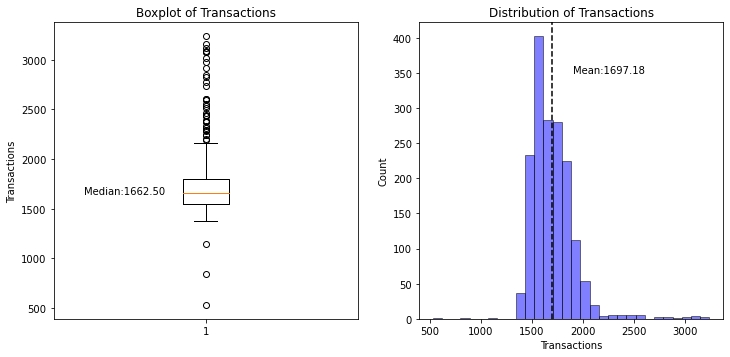

In [359]:
#boxplot of launch mass
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.boxplot(dfa['trans_mean'])
plt.text(0.6,1650,'Median:{:.2f}'.format(dfa['trans_mean'].median()))
plt.title("Boxplot of Transactions")
plt.ylabel("Transactions")

#histogram of launch mass
plt.subplot(2,2,2)
plt.hist(dfa['trans_mean'], bins=30, alpha=0.5, color='b',edgecolor='k')
#Drawing a line to show the mean
plt.axvline(dfa['trans_mean'].mean(), linestyle='dashed', color='k')
plt.text(1900,350,'Mean:{:.2f}'.format(dfa['trans_mean'].mean()))
plt.title("Distribution of Transactions")
plt.xlabel("Transactions")
plt.ylabel("Count")
plt.show()

In [360]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df3 = df1[['sales','transactions','city']]
mm = MinMaxScaler()
df3[['sales','transactions']] = mm.fit_transform(df3[['sales','transactions']])

<ipython-input-360-17f2d6c3cfc7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['sales','transactions']] = mm.fit_transform(df3[['sales','transactions']])
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [361]:
df3 = pd.get_dummies(df3,columns=['city'])
df3.head()

df3 = df3.sample(frac=0.001,replace=True, random_state=1)

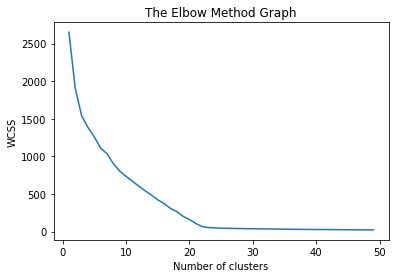

In [362]:
from sklearn.cluster import KMeans
wcss=[]
#km =KMeans(n_clusters=5)
#clusters = km.fit_predict(df3)
#c_df = pd.DataFrame(clusters)

for i in range(1,50): 
    km = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    km.fit(df3)
    wcss.append(km.inertia_)
        

plt.plot(range(1,50),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

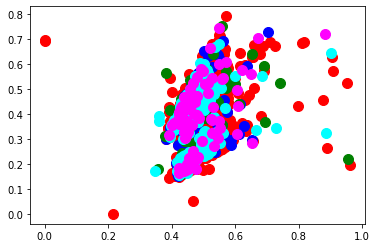

In [363]:
km = KMeans(n_clusters=22, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
km.fit(df3)

y_kmeans = km.fit_predict(df3)

filtered_label1 = df3[y_kmeans == 1]
filtered_label2 = df3[y_kmeans == 2]
filtered_label3 = df3[y_kmeans == 3]
filtered_label4 = df3[y_kmeans == 4]    
filtered_label5 = df3[y_kmeans == 5]
 
plt.scatter(filtered_label1['transactions'] , filtered_label1['sales'], s=100, c='red', label ='Cluster 1')
plt.scatter(filtered_label2['transactions']  , filtered_label2['sales'], s=100, c='blue', label ='Cluster 2')
plt.scatter(filtered_label3['transactions']  , filtered_label3['sales'], s=100, c='green', label ='Cluster 3')
plt.scatter(filtered_label4['transactions']  , filtered_label4['sales'], s=100, c='cyan', label ='Cluster 4')
plt.scatter(filtered_label5['transactions']  , filtered_label5['sales'], s=100, c='magenta', label ='Cluster 5')

In [364]:
y_kmeans

array([ 7,  1, 10, ...,  5,  0,  1])